## Pipeline trainer

Designing a pipeline.

In [24]:
from sklearn.datasets import _samples_generator
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors



In [5]:

# Generate data 
X, y = _samples_generator.make_classification(
    n_samples=150, 
    n_features=25, 
    n_classes=3, 
    n_informative=6, 
    n_redundant=0, 
    random_state=7)


In [17]:
X.view()

array([[ 1.01856035, -0.1850947 ,  0.33953529, ..., -0.89722827,
         2.43356744, -0.69119524],
       [-0.27783108,  0.99897481,  0.53479038, ...,  0.22153721,
         1.2023667 ,  0.30568521],
       [ 0.03110801,  1.14511831,  0.28923459, ..., -1.05191555,
         0.09786165, -0.65803802],
       ...,
       [-0.26170774,  0.83418331,  0.9540871 , ...,  0.43996139,
         1.29141862,  0.58900801],
       [ 0.09728851, -2.19374974,  0.82561751, ...,  0.19169576,
         0.38328131,  1.45836114],
       [-0.11176114, -0.44320815, -0.8666994 , ...,  1.00486657,
         0.38439339,  1.38943378]])

In [18]:
y.view()

array([0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1,
       0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0,
       2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1,
       1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1,
       1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2])

In [6]:

# Select top K features 
k_best_selector = SelectKBest(f_regression, k=9)


In [19]:
print(k_best_selector)

SelectKBest(k=7, score_func=<function f_regression at 0x000001E4AAC2C4A0>)


In [7]:

# Initialize Extremely Random Forests classifier 
classifier = ExtraTreesClassifier(n_estimators=60, max_depth=4)


In [20]:
print(classifier)

ExtraTreesClassifier(max_depth=4, n_estimators=30)


In [ ]:

# Construct the pipeline
processor_pipeline = Pipeline([('selector', k_best_selector), ('erf', classifier)])


In [21]:
print(processor_pipeline)

Pipeline(steps=[('selector',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x000001E4AAC2C4A0>)),
                ('erf', ExtraTreesClassifier(max_depth=4, n_estimators=30))])


In [9]:

# Set the parameters
processor_pipeline.set_params(selector__k=7, erf__n_estimators=30)


Pipeline(steps=[('selector',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x000001E4AAC2C4A0>)),
                ('erf', ExtraTreesClassifier(max_depth=4, n_estimators=30))])

In [10]:

# Training the pipeline 
processor_pipeline.fit(X, y)


Pipeline(steps=[('selector',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x000001E4AAC2C4A0>)),
                ('erf', ExtraTreesClassifier(max_depth=4, n_estimators=30))])

In [11]:

# Predict outputs for the input data
output = processor_pipeline.predict(X)
print("\nPredicted output:\n", output)



Predicted output:
 [0 2 2 0 2 0 2 1 0 1 1 2 2 0 2 2 1 0 0 1 0 2 1 1 2 2 0 0 1 2 1 2 1 0 2 2 1
 1 2 2 2 0 1 0 2 1 1 2 1 0 1 2 2 2 2 0 2 2 0 2 2 0 1 0 2 2 1 1 1 2 1 1 0 2
 0 0 1 1 2 0 0 2 2 2 2 0 0 0 2 2 2 1 2 0 2 1 2 2 0 0 1 1 1 1 2 2 2 2 0 1 1
 0 2 1 0 0 1 1 1 1 0 0 0 1 2 0 0 0 2 1 2 0 0 1 0 1 1 0 1 1 1 2 2 2 1 1 2 0
 2 2]


In [12]:

# Print scores 
print("\nScore:", processor_pipeline.score(X, y))



Score: 0.8866666666666667


In [13]:

# Print the features chosen by the pipeline selector
status = processor_pipeline.named_steps['selector'].get_support()


In [14]:

# Extract and print indices of selected features
selected = [i for i, x in enumerate(status) if x]
print("\nIndices of selected features:", ', '.join([str(x) for x in selected]))


Indices of selected features: 4, 7, 8, 12, 14, 17, 22


## Extracting NN

In [26]:
# Input data
X = np.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9], 
        [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9],
        [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]])


In [28]:
# Number of nearest neighbors
k = 5

In [45]:
# Test datapoint 
test_datapoint = [3.1, 2.5]

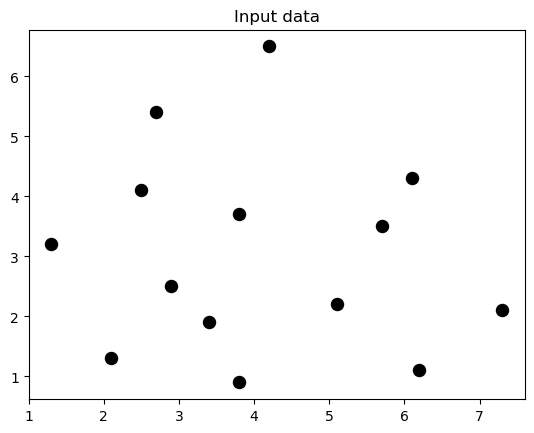

In [46]:
# Plot input data 
plt.figure()
plt.title('Input data')
plt.scatter(X[:,0], X[:,1], marker='o', s=75, color='black')

In [47]:
# Build K Nearest Neighbors model
knn_model = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
distances, indices = knn_model.kneighbors([test_datapoint])


In [48]:
# Print the 'k' nearest neighbors
print("\nK Nearest Neighbors:")
for rank, index in enumerate(indices[0][:k], start=1):
    print(str(rank) + " ==>", X[index])



K Nearest Neighbors:
1 ==> [2.9 2.5]
2 ==> [3.4 1.9]
3 ==> [3.8 3.7]
4 ==> [2.1 1.3]
5 ==> [2.5 4.1]


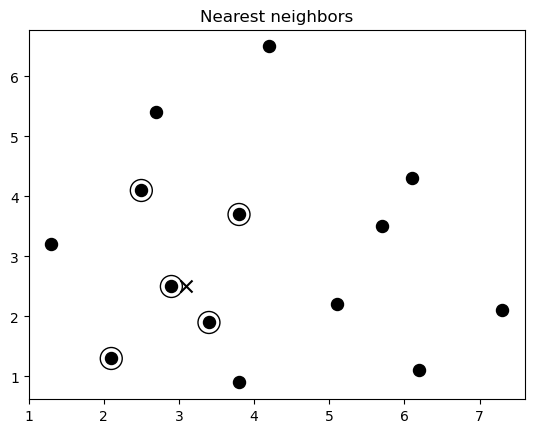

In [49]:
# Visualize the nearest neighbors along with the test datapoint 
plt.figure()
plt.title('Nearest neighbors')
plt.scatter(X[:, 0], X[:, 1], marker='o', s=75, color='k')
plt.scatter(X[indices][0][:][:, 0], X[indices][0][:][:, 1], 
        marker='o', s=250, color='k', facecolors='none')
plt.scatter(test_datapoint[0], test_datapoint[1],
        marker='x', s=75, color='k')

plt.show()

## Building KNN classifier